In [370]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [371]:
result=requests.get('https://api.openaq.org/v1/measurements?city=Delhi&parameter[]=co&parameter[]=pm25&parameter[]=so2&parameter[]=pm10&parameter[]=o3&parameter[]=co').json()

In [372]:
result.keys()

dict_keys(['meta', 'results'])

In [373]:
df = pd.DataFrame(result['results'])

In [374]:
df.head()

,location,parameter,date,value,unit,coordinates,country,city
0,"CRRI Mathura Road, Delhi - IMD",o3,"{'utc': '2020-10-11T14:15:00Z', 'local': '2020...",7.87,µg/m³,"{'latitude': 28.5512005, 'longitude': 77.2735737}",IN,Delhi
1,"CRRI Mathura Road, Delhi - IMD",co,"{'utc': '2020-10-11T14:15:00Z', 'local': '2020...",1630.00,µg/m³,"{'latitude': 28.5512005, 'longitude': 77.2735737}",IN,Delhi
2,"CRRI Mathura Road, Delhi - IMD",pm10,"{'utc': '2020-10-11T14:15:00Z', 'local': '2020...",300.98,µg/m³,"{'latitude': 28.5512005, 'longitude': 77.2735737}",IN,Delhi
3,"North Campus, DU, Delhi - IMD",o3,"{'utc': '2020-10-11T14:15:00Z', 'local': '2020...",9.81,µg/m³,"{'latitude': 28.6573814, 'longitude': 77.1585447}",IN,Delhi
4,"North Campus, DU, Delhi - IMD",pm25,"{'utc': '2020-10-11T14:15:00Z', 'local': '2020...",94.00,µg/m³,"{'latitude': 28.6573814, 'longitude': 77.1585447}",IN,Delhi


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     100 non-null    object 
 1   parameter    100 non-null    object 
 2   date         100 non-null    object 
 3   value        100 non-null    float64
 4   unit         100 non-null    object 
 5   coordinates  100 non-null    object 
 6   country      100 non-null    object 
 7   city         100 non-null    object 
dtypes: float64(1), object(7)
memory usage: 6.4+ KB


In [376]:
df.describe()

,value
count,100.00000
mean,401.56740
std,644.15492
min,0.93000
25%,21.95000
50%,94.50000
75%,299.30750
max,2620.00000


In [377]:
# Now as we can see that some of the columns are irrelevant in the dataset so lets drop those columns

In [378]:
df.drop(['date','coordinates'],axis=1,inplace=True)

In [379]:
# In the columns lets see that how many columns are  catagorical and how many of them are numerical

In [380]:
numerical_col=[col for col in df.columns if df[col].dtypes == 'O']
print ('The no of numerical col in the dataset are -:',len(numerical_col))
for col in numerical_col:
    print('The names of numerical columns in the dataset are -:', col)


The no of numerical col in the dataset are -: 5
The names of numerical columns in the dataset are -: location
The names of numerical columns in the dataset are -: parameter
The names of numerical columns in the dataset are -: unit
The names of numerical columns in the dataset are -: country
The names of numerical columns in the dataset are -: city


In [381]:
cetagorical_col=[col for col in df.columns if df[col].dtypes != 'O']
print ('The no of cetagorical col in the dataset are -:',len(cetagorical_col))
for col in cetagorical_col:
    print('The names of cetagorical columns in the dataset are -:', col)

The no of cetagorical col in the dataset are -: 1
The names of cetagorical columns in the dataset are -: value


In [382]:
df

,location,parameter,value,unit,country,city
0,"CRRI Mathura Road, Delhi - IMD",o3,7.87,µg/m³,IN,Delhi
1,"CRRI Mathura Road, Delhi - IMD",co,1630.00,µg/m³,IN,Delhi
2,"CRRI Mathura Road, Delhi - IMD",pm10,300.98,µg/m³,IN,Delhi
3,"North Campus, DU, Delhi - IMD",o3,9.81,µg/m³,IN,Delhi
4,"North Campus, DU, Delhi - IMD",pm25,94.00,µg/m³,IN,Delhi
...,...,...,...,...,...,...
95,"Lodhi Road, Delhi - IMD",co,470.00,µg/m³,IN,Delhi
96,"Lodhi Road, Delhi - IMD",pm10,162.29,µg/m³,IN,Delhi
97,"Lodhi Road, Delhi - IMD",pm25,47.23,µg/m³,IN,Delhi
98,"DTU, Delhi - CPCB",co,1410.00,µg/m³,IN,Delhi


In [383]:
# Now in the datset we have a column 'Parameter' which have different parameters so lets see those parameters and classify them

In [384]:
for col in numerical_col:
    print('The no of unique values in ',col,'are',df[col].nunique())
    print(df[col].unique())
    
# so from here we can see that how many each column exist so now lets classify them

The no of unique values in  location are 14
['CRRI Mathura Road, Delhi - IMD' 'North Campus, DU, Delhi - IMD'
 'Lodhi Road, Delhi - IMD' 'Aya Nagar, Delhi - IMD'
 'IGI Airport (T3), Delhi - IMD' 'IHBAS, Dilshad Garden, Delhi - CPCB'
 'Shadipur, Delhi - CPCB' 'NSIT Dwarka, Delhi - CPCB' 'ITO, Delhi - CPCB'
 'DTU, Delhi - CPCB' 'Sirifort, Delhi - CPCB' 'Punjabi Bagh, Delhi - DPCC'
 'R K Puram, Delhi - DPCC' 'Mandir Marg, Delhi - DPCC']
The no of unique values in  parameter are 5
['o3' 'co' 'pm10' 'pm25' 'so2']
The no of unique values in  unit are 1
['µg/m³']
The no of unique values in  country are 1
['IN']
The no of unique values in  city are 1
['Delhi']


In [385]:
dd=pd.get_dummies(df['parameter'],prefix='para_')

In [386]:
df=pd.concat([df, dd], axis=1, sort=False)
# In the below columns we have add  the different parameters in the form of different columns have concatinate the with the dataframe

In [387]:
df

,location,parameter,value,unit,country,city,para__co,para__o3,para__pm10,para__pm25,para__so2
0,"CRRI Mathura Road, Delhi - IMD",o3,7.87,µg/m³,IN,Delhi,0,1,0,0,0
1,"CRRI Mathura Road, Delhi - IMD",co,1630.00,µg/m³,IN,Delhi,1,0,0,0,0
2,"CRRI Mathura Road, Delhi - IMD",pm10,300.98,µg/m³,IN,Delhi,0,0,1,0,0
3,"North Campus, DU, Delhi - IMD",o3,9.81,µg/m³,IN,Delhi,0,1,0,0,0
4,"North Campus, DU, Delhi - IMD",pm25,94.00,µg/m³,IN,Delhi,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,"Lodhi Road, Delhi - IMD",co,470.00,µg/m³,IN,Delhi,1,0,0,0,0
96,"Lodhi Road, Delhi - IMD",pm10,162.29,µg/m³,IN,Delhi,0,0,1,0,0
97,"Lodhi Road, Delhi - IMD",pm25,47.23,µg/m³,IN,Delhi,0,0,0,1,0
98,"DTU, Delhi - CPCB",co,1410.00,µg/m³,IN,Delhi,1,0,0,0,0


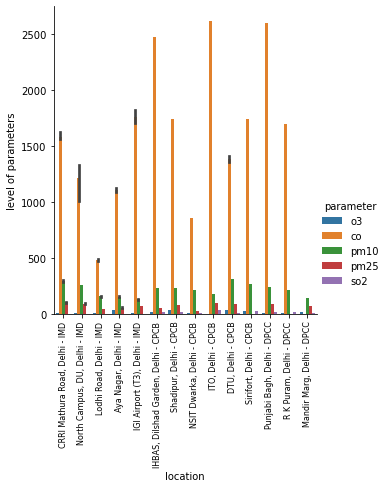

In [388]:
sns.catplot(x="location", y="value", hue="parameter", kind="bar", data=df)
plt.xticks(rotation='vertical',size=8)
plt.xlabel('location')
plt.ylabel('level of parameters')
plt.show()

In [389]:
# from the above graph we can easily see that co level is much higher that that of other parameters 
# 1. now we can see that from the graph there are three major areas which have highest level of co in the envoirment
# (punjabi bagh, ITO, and IHBAS dilshad garden) 

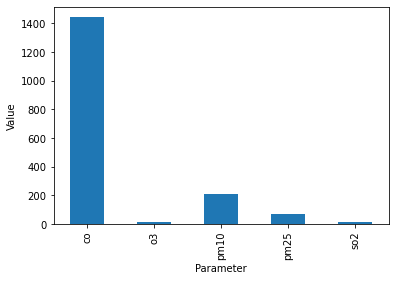

In [390]:
# Now in the column below lets analyze that which parameters dominates the envoirment mainly
df.groupby('parameter')['value'].mean().plot.bar()
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.show()

In [391]:
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [392]:
agg_func={
    'para__co':['mean','sum'],
    'para__o3':['mean','sum'],
    'para__pm10':['mean','sum'],
    'para__pm25':['mean','sum'],
    'para__so2':['mean','sum'],
     'value':['mean','median','min','max','sum']
    }


location_parameters=df.groupby('location').agg(agg_func)

In [393]:
location_parameters

para__co      para__o3     para__pm10  \
                                         mean sum      mean sum       mean   
location                                                                     
Aya Nagar, Delhi - IMD               0.250000   3  0.250000   3   0.250000   
CRRI Mathura Road, Delhi - IMD       0.250000   3  0.250000   3   0.250000   
DTU, Delhi - CPCB                    0.285714   2  0.142857   1   0.142857   
IGI Airport (T3), Delhi - IMD        0.250000   2  0.250000   2   0.250000   
IHBAS, Dilshad Garden, Delhi - CPCB  0.200000   1  0.200000   1   0.200000   
ITO, Delhi - CPCB                    0.200000   1  0.200000   1   0.200000   
Lodhi Road, Delhi - IMD              0.250000   3  0.250000   3   0.250000   
Mandir Marg, Delhi - DPCC            0.000000   0  0.250000   1   0.250000   
NSIT Dwarka, Delhi - CPCB            0.200000   1  0.200000   1   0.200000   
North Campus, DU, Delhi - IMD        0.250000   3  0.250000   3   0.250000   
Punjabi Bagh, Delhi - DPCC           0.200000   1  0.200000   1   0.200000   
R K Puram, Delhi - DPCC              0.250000   1  0.250000   1   0.250000   
Shadipur, Delhi - CPCB               0.200000   1  0.200000   1   0.200000   
Sirifort, Delhi - CPCB               0.250000   1  0.250000   1   0.250000   

                                        para__pm25     para__so2      \
                                    sum       mean sum      mean sum   
location                                                               
Aya Nagar, Delhi - IMD                3   0.250000   3  0.000000   0   
CRRI Mathura Road, Delhi - IMD        3   0.250000   3  0.000000   0   
DTU, Delhi - CPCB                     1   0.285714   2  0.142857   1   
IGI Airport (T3), Delhi - IMD         2   0.250000   2  0.000000   0   
IHBAS, Dilshad Garden, Delhi - CPCB   1   0.200000   1  0.200000   1   
ITO, Delhi - CPCB                     1   0.200000   1  0.200000   1   
Lodhi Road, Delhi - IMD               3   0.250000   3  0.000000   0   
Mandir Marg, Delhi - DPCC             1   0.250000   1  0.250000   1   
NSIT Dwarka, Delhi - CPCB             1   0.200000   1  0.200000   1   
North Campus, DU, Delhi - IMD         3   0.250000   3  0.000000   0   
Punjabi Bagh, Delhi - DPCC            1   0.200000   1  0.200000   1   
R K Puram, Delhi - DPCC               1   0.000000   0  0.250000   1   
Shadipur, Delhi - CPCB                1   0.200000   1  0.200000   1   
Sirifort, Delhi - CPCB                1   0.000000   0  0.250000   1   

                                          value                          \
                                           mean   median    min     max   
location                                                                  
Aya Nagar, Delhi - IMD               338.574167  106.295  35.07  1130.0   
CRRI Mathura Road, Delhi - IMD       496.681667  194.910   7.18  1630.0   
DTU, Delhi - CPCB                    471.564286   89.590   6.30  1410.0   
IGI Airport (T3), Delhi - IMD        492.710000   97.995   7.84  1820.0   
IHBAS, Dilshad Garden, Delhi - CPCB  559.036000   53.600  13.16  2480.0   
ITO, Delhi - CPCB                    584.722000   95.000   0.93  2620.0   
Lodhi Road, Delhi - IMD              171.682500  100.100   4.28   490.0   
Mandir Marg, Delhi - DPCC             58.375000   38.900  10.70   145.0   
NSIT Dwarka, Delhi - CPCB            224.008000   29.230   6.20   860.0   
North Campus, DU, Delhi - IMD        393.839167  174.800   9.20  1330.0   
Punjabi Bagh, Delhi - DPCC           590.620000   85.000  11.40  2600.0   
R K Puram, Delhi - DPCC              484.500000  113.900  10.20  1700.0   
Shadipur, Delhi - CPCB               418.470000   74.950  14.30  1740.0   
Sirifort, Delhi - CPCB               512.250000  144.200  20.60  1740.0   

                                              
                                         sum  
location                                      
Aya Nagar, Delhi - IMD               4062.89  
CRRI Mathura Road, De

In [394]:
dd=pd.get_dummies(df['location'],prefix='Area_')

In [395]:
df=pd.concat([df, dd], axis=1, sort=False)
# In the below columns we have add  the different locations in the form of different columns have concatinate them with the dataframe

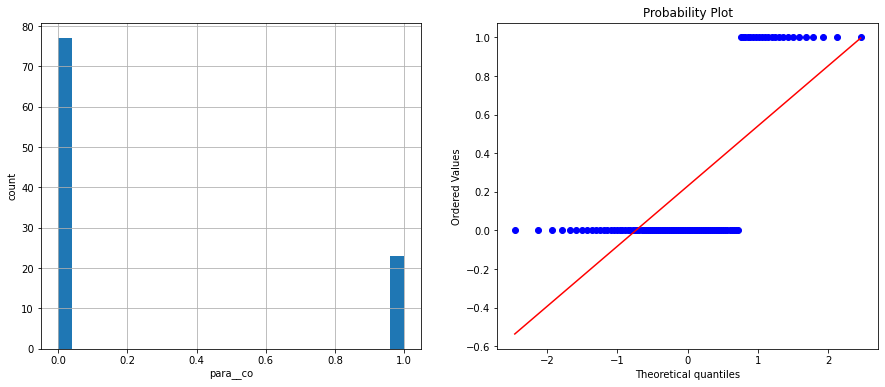

1.3027947531707582


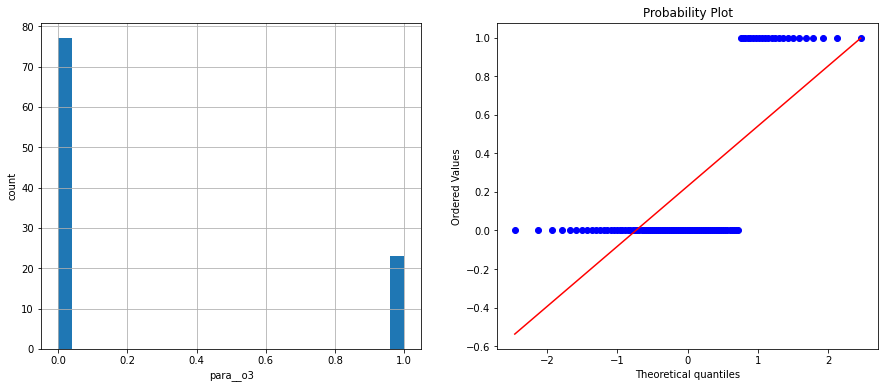

1.302794753170758


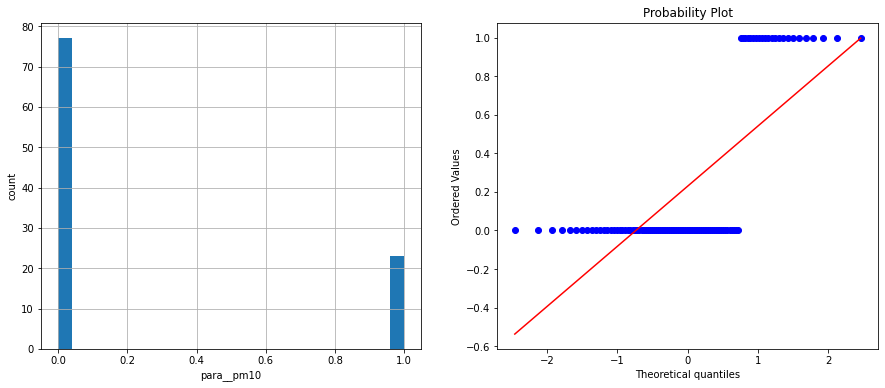

1.3027947531707582


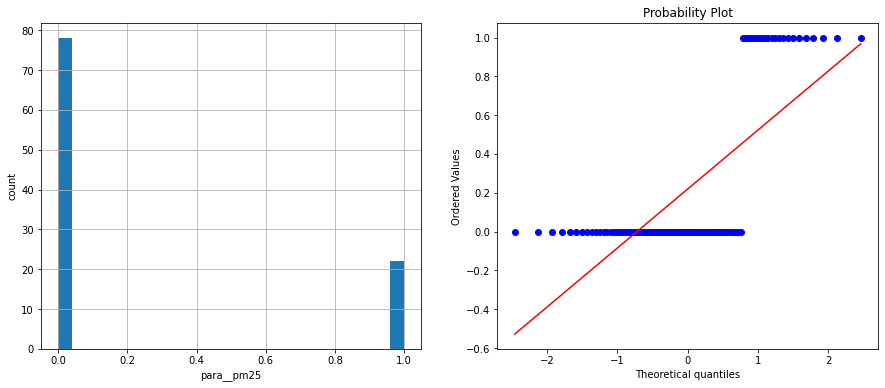

1.3725270326150327


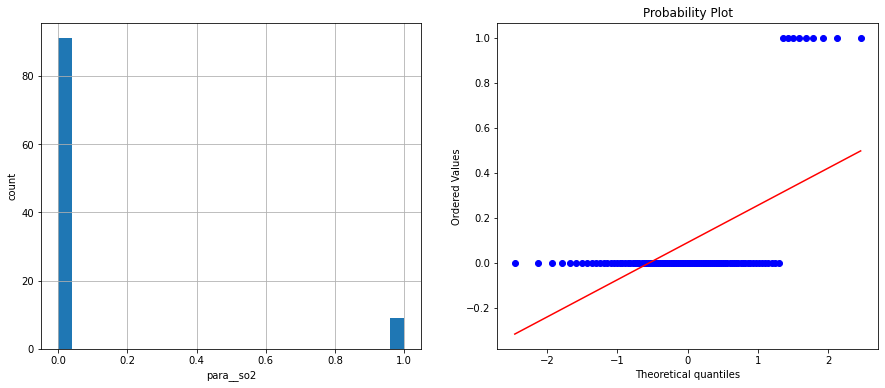

2.9091319704050744


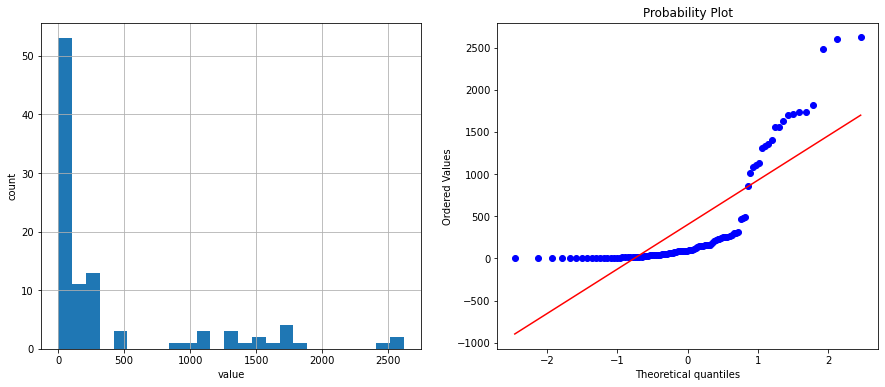

1.9110938870661067


In [396]:
dd=['para__co','para__o3','para__pm10','para__pm25','para__so2','value']
for col in dd:
    data=df.copy()
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('count')
   
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.show()
    print(data[col].skew())

In [397]:
df.drop(['location','parameter','unit','country','city'], axis=1, inplace=True)
# In the below columns we have add  the different locations in the form of different columns have concatinate them with the dataframe

In [398]:
X=df.drop('value',axis=1)
Y=np.array(df['value'])
X

,para__co,para__o3,para__pm10,para__pm25,para__so2,"Area__Aya Nagar, Delhi - IMD","Area__CRRI Mathura Road, Delhi - IMD","Area__DTU, Delhi - CPCB","Area__IGI Airport (T3), Delhi - IMD","Area__IHBAS, Dilshad Garden, Delhi - CPCB","Area__ITO, Delhi - CPCB","Area__Lodhi Road, Delhi - IMD","Area__Mandir Marg, Delhi - DPCC","Area__NSIT Dwarka, Delhi - CPCB","Area__North Campus, DU, Delhi - IMD","Area__Punjabi Bagh, Delhi - DPCC","Area__R K Puram, Delhi - DPCC","Area__Shadipur, Delhi - CPCB","Area__Sirifort, Delhi - CPCB"
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
97,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
98,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [399]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=11)

In [400]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#Reshaping ti fit the scaler
Y_train = Y_train.reshape((len(Y_train), 1)) 

Y_train = sc.fit_transform(Y_train)

#Restoring the original shape after scaling
Y_train = Y_train.ravel()

In [401]:
lr.fit(X_train,Y_train)

LinearRegression()

In [402]:
Y_pred=lr.predict(X_test)

In [403]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

-0.5177650890953143